In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import Image
import os
import glob
plt.style.use('seaborn')

In [30]:
mnist_results = glob.glob('output/run_?/metrics_*.csv')
toy_results = glob.glob('output/run_toy_*/metrics_*.csv')

In [3]:
regr_buffer = 10

def regr_slope(z):
    x = np.array(range(0, len(z)))
    y = z
    x_std = x.std()
    y_std = y.std()
    (r,_) = stats.pearsonr(x, y)
    return r * (y_std/x_std)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


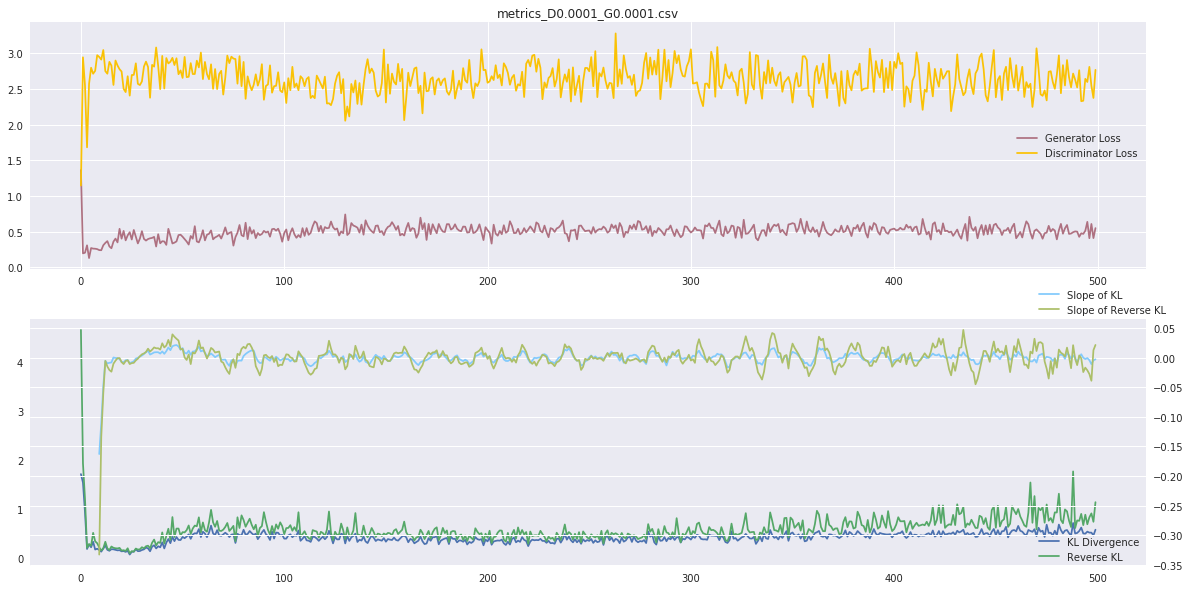

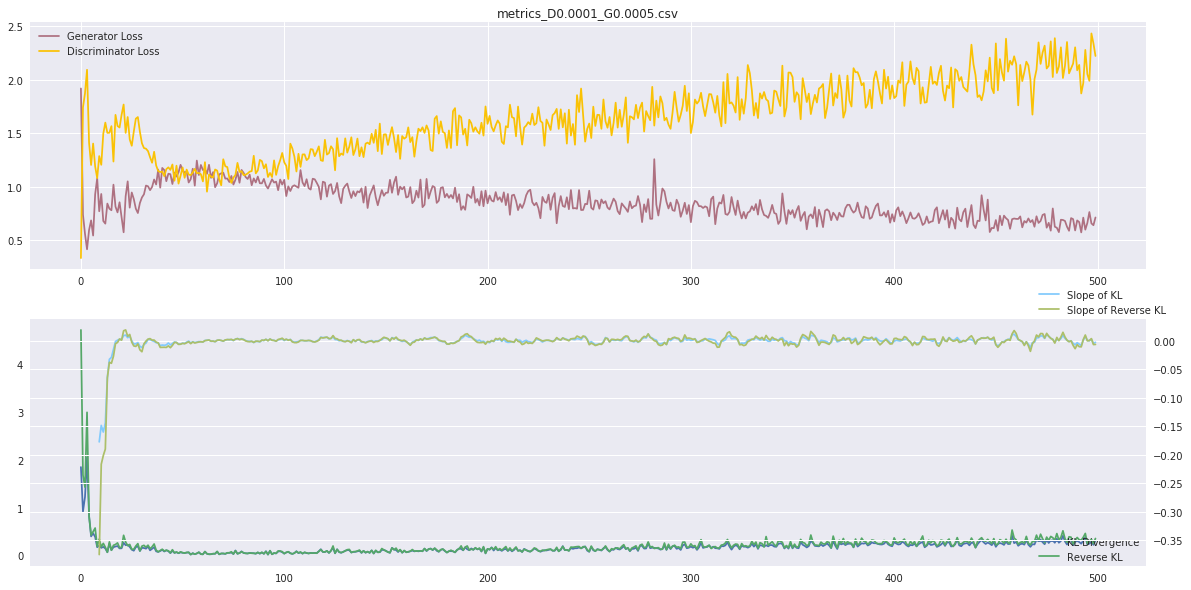

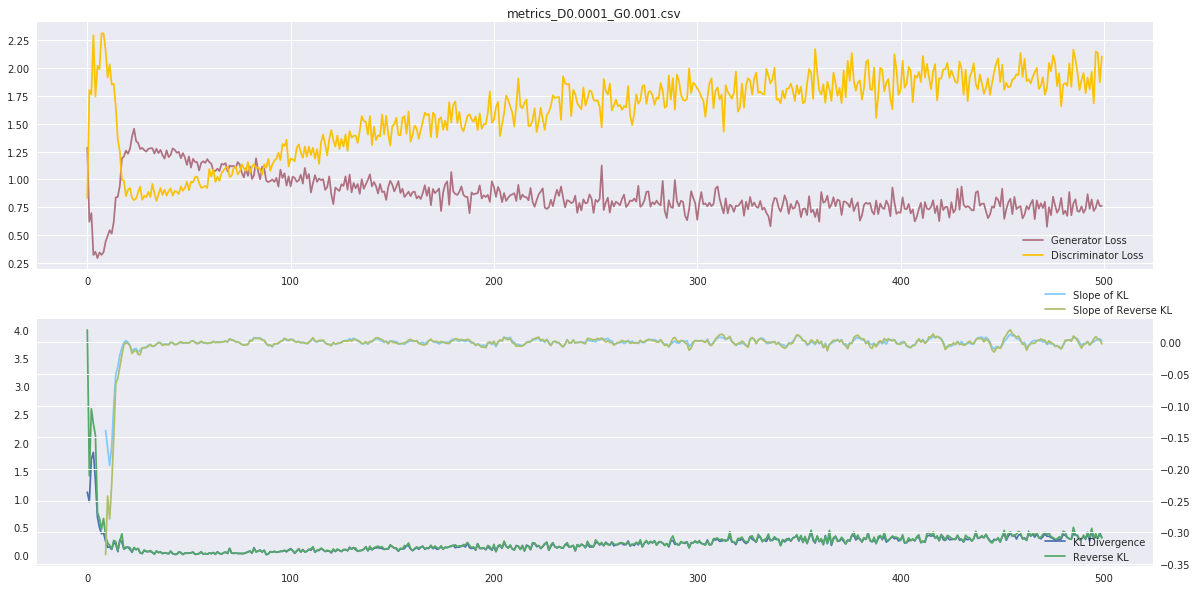

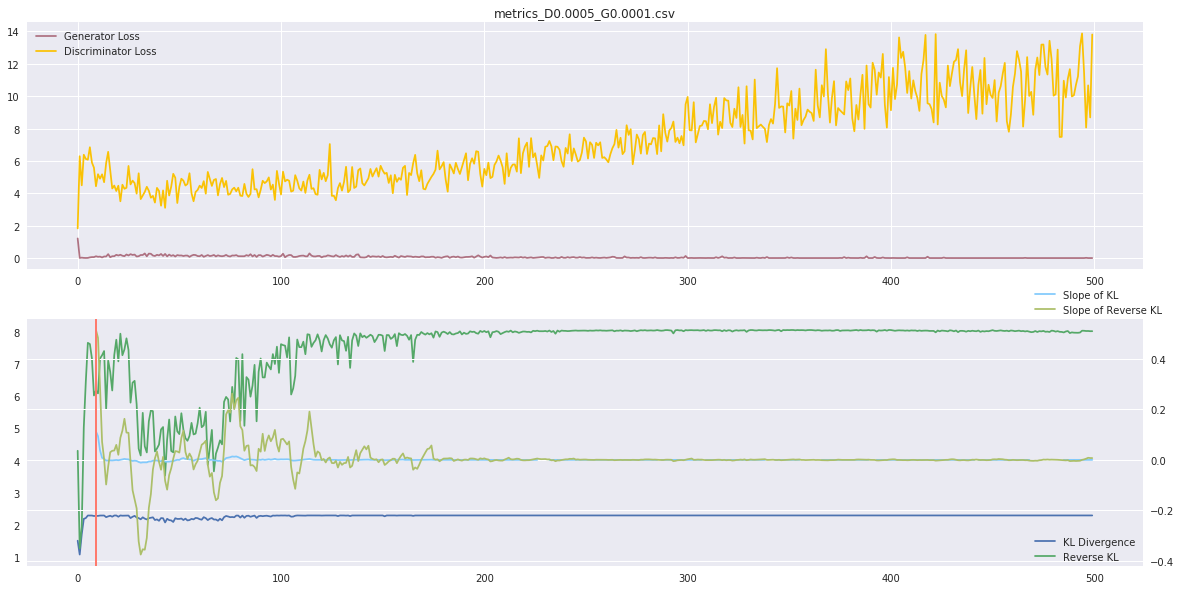

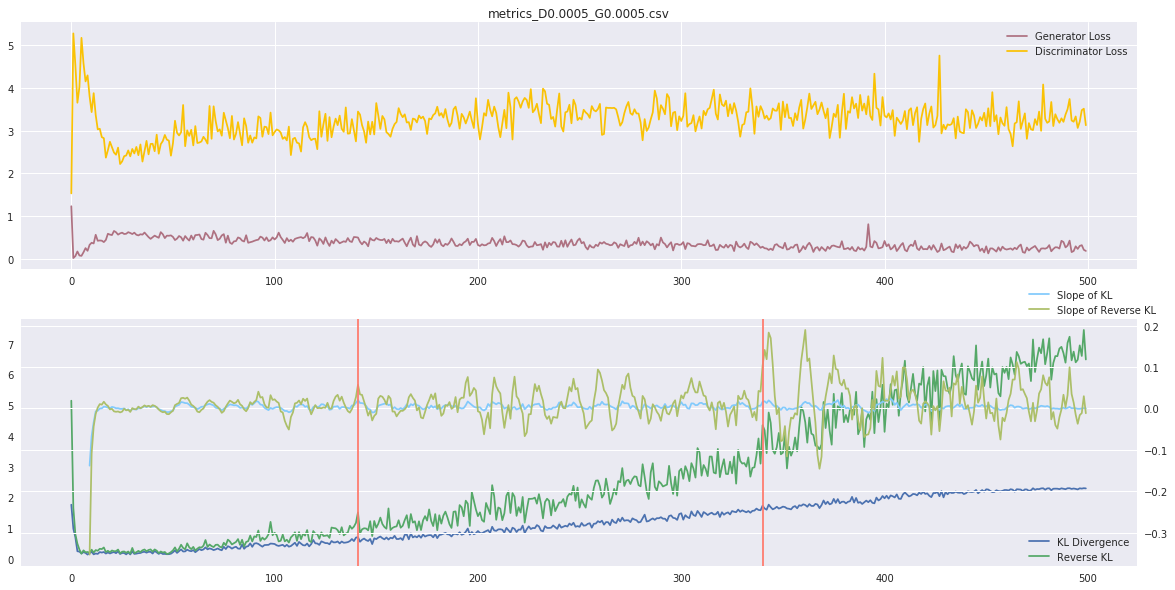

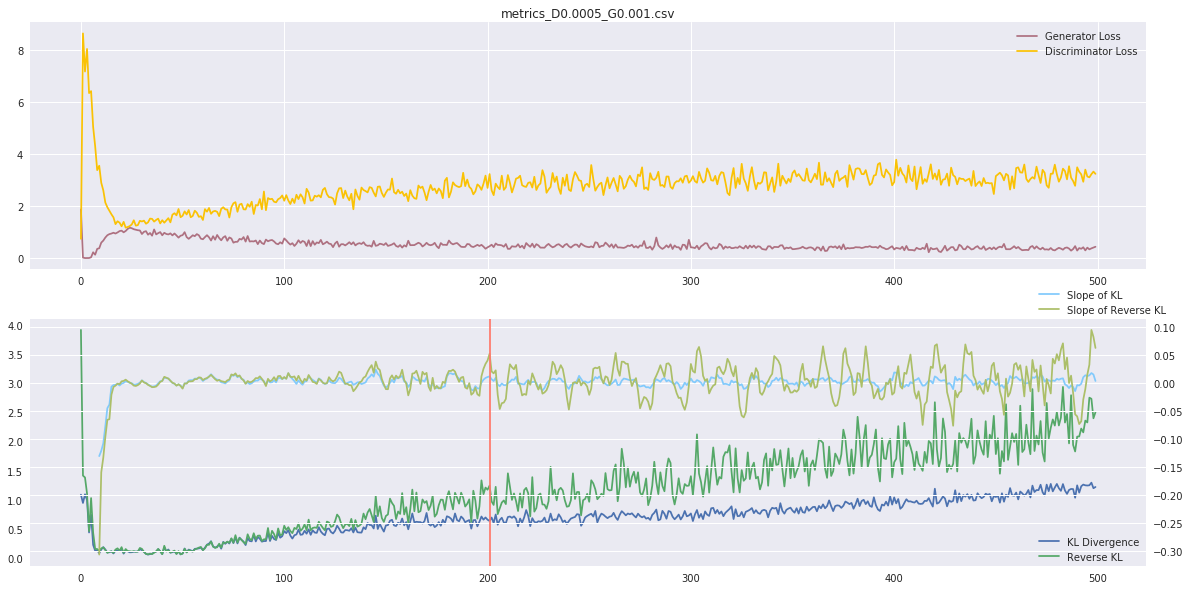

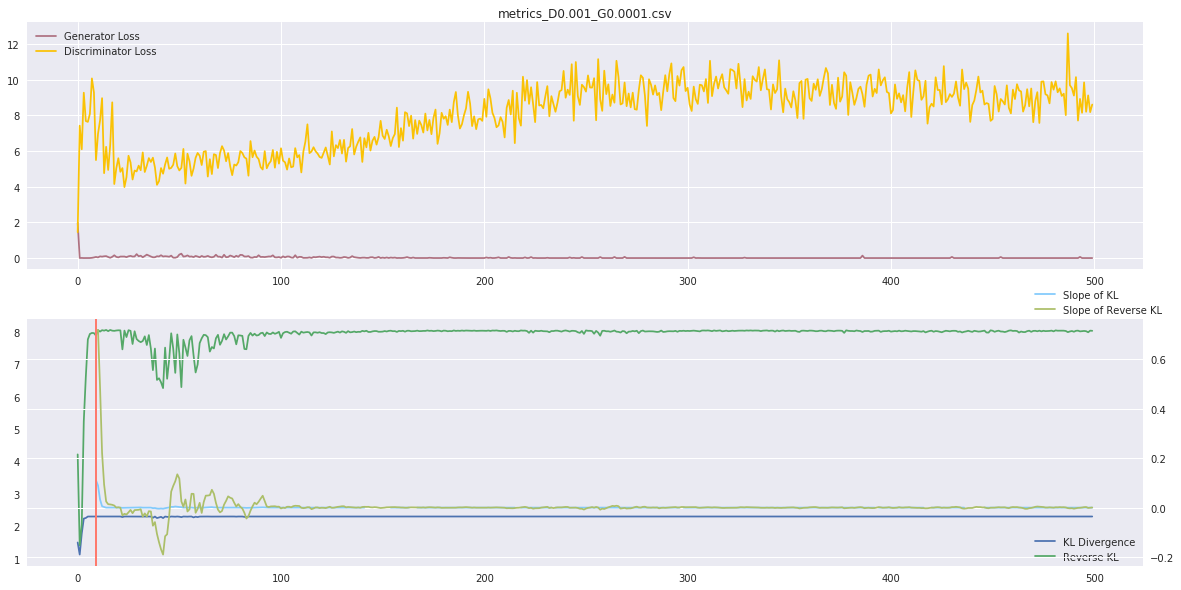

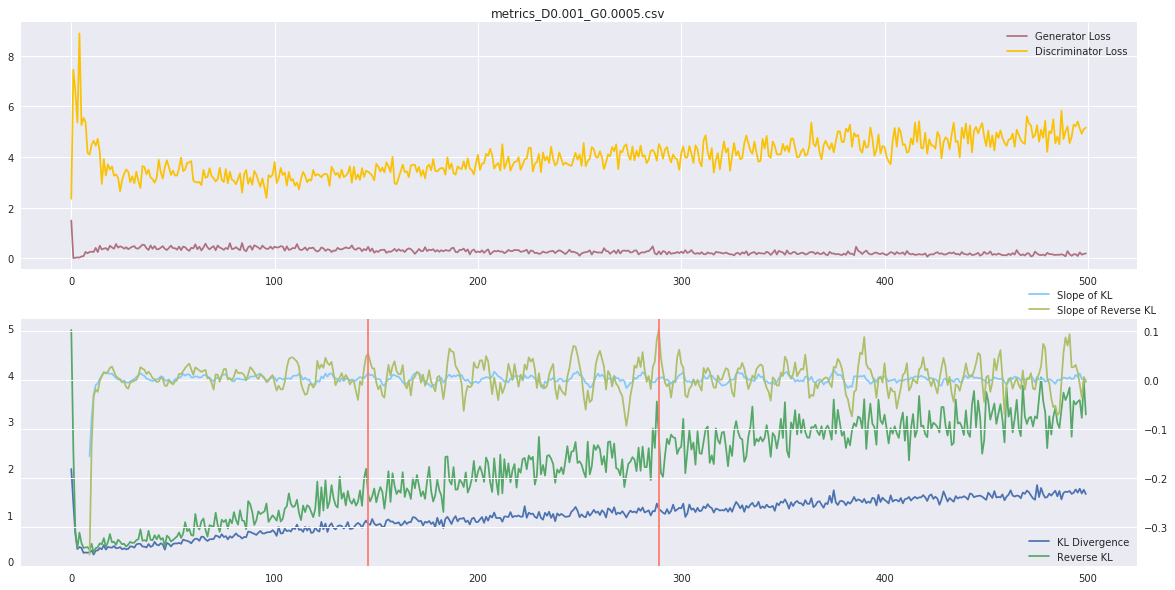

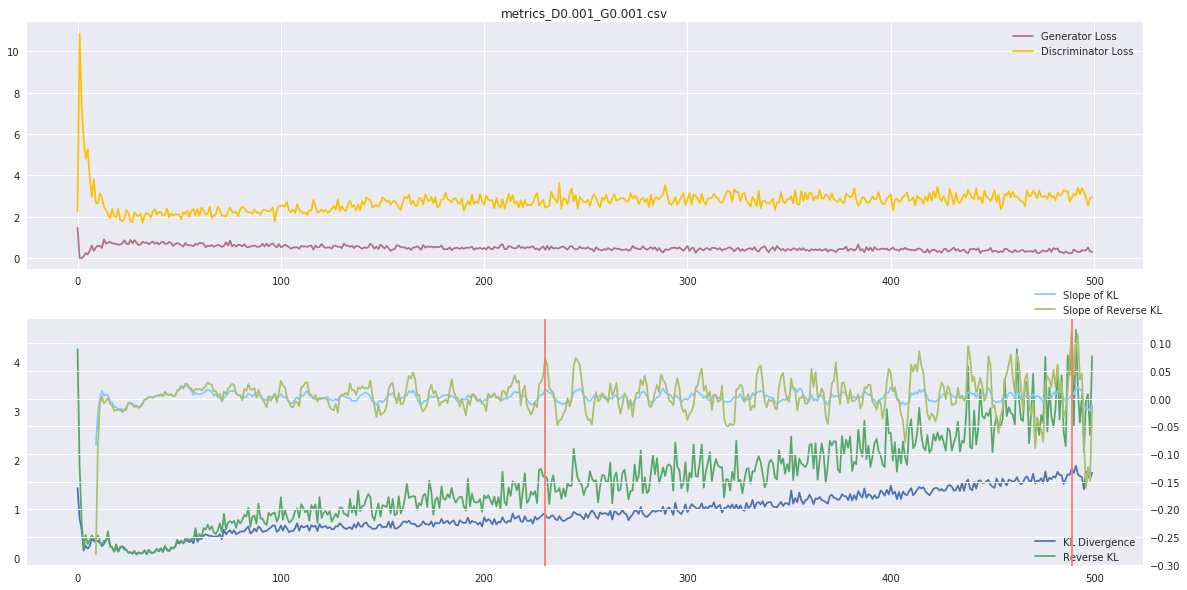

In [40]:
for r in mnist_results:
    
    # grab info
    location, filename = os.path.split(r)
    df = pd.read_csv(r)
    
    #calculations
    df['KLSlope'] = df['KLDivergence'].rolling(regr_buffer).apply(lambda z: regr_slope(z))
    df['RevKLSlope'] = df['RevKLDivergence'].rolling(regr_buffer).apply(lambda z: regr_slope(z))
    
    cutoff_0_1 = df[ df['RevKLSlope'] > 0.1 ].head(1).index
    cutoff_0_05 = df[ df['RevKLSlope'] > 0.05 ].head(1).index
    
    # plot...
    fig = plt.figure(figsize=(20,10))
    
    # losses
    ax = plt.subplot(2,1,1)
    plt.title(filename)
    ax.plot(df['# GLoss'], label='Generator Loss', color='xkcd:mauve')
    ax.plot(df['DLoss'], label='Discriminator Loss', color='xkcd:goldenrod')
    plt.legend()
    # metrics
    ax2 = plt.subplot(2,1,2)
    ax2.grid(False)
    ax2.plot(df['KLDivergence'], label='KL Divergence')
    ax2.plot(df['RevKLDivergence'], label='Reverse KL')
    plt.legend(loc=(0.9, 0))
    # slopes of metrics
    ax3 = ax2.twinx()
    ax3.plot(df['KLSlope'], label='Slope of KL', color='xkcd:sky')
    ax3.plot(df['RevKLSlope'], label='Slope of Reverse KL', color='xkcd:light olive')
    if len(cutoff_0_1):
        plt.axvline(cutoff_0_1.values, color='xkcd:salmon')
    if len(cutoff_0_05):
        plt.axvline(cutoff_0_05.values, color='xkcd:salmon')
    
    plt.legend(loc=(0.9,1.0))
    
    plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


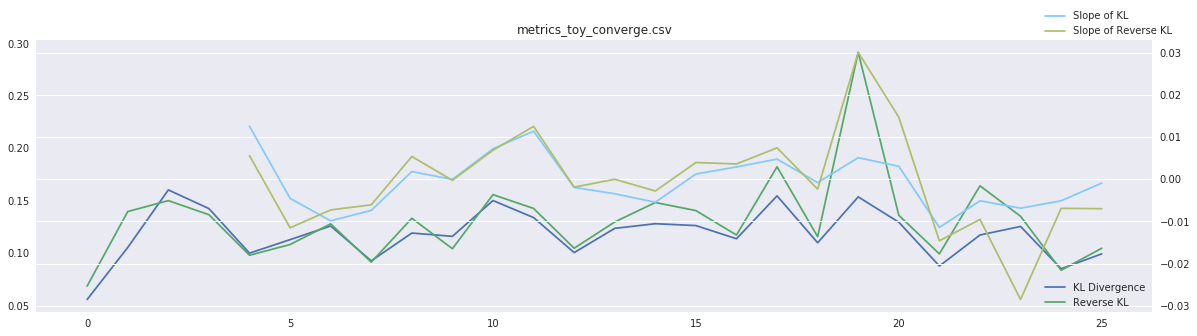

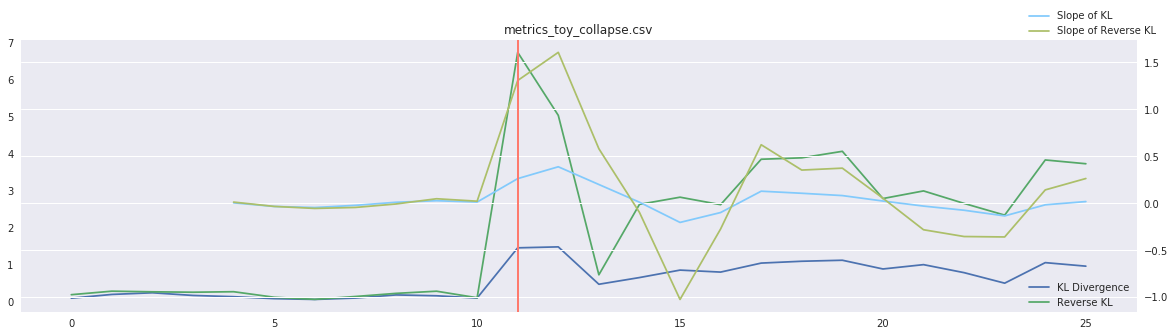

In [41]:
for r in toy_results:
    
    # grab info
    location, filename = os.path.split(r)
    df = pd.read_csv(r)
    
    #calculations
    df['KLSlope'] = df['# KLDivergence'].rolling(5).apply(lambda z: regr_slope(z))
    df['RevKLSlope'] = df['RevKLDivergence'].rolling(5).apply(lambda z: regr_slope(z))
    
    cutoff_0_1 = df[ df['RevKLSlope'] > 0.1 ].head(1).index
    cutoff_0_05 = df[ df['RevKLSlope'] > 0.05 ].head(1).index
    
    # plot...
    fig = plt.figure(figsize=(20,5))
    
    # losses
    ax = plt.gca()
    ax.grid(False)
    plt.title(filename)
    ax.plot(df['# KLDivergence'], label='KL Divergence')
    ax.plot(df['RevKLDivergence'], label='Reverse KL')
    plt.legend(loc=(0.9, 0))
    # slopes of metrics
    ax2 = ax.twinx()
    ax2.plot(df['KLSlope'], label='Slope of KL', color='xkcd:sky')
    ax2.plot(df['RevKLSlope'], label='Slope of Reverse KL', color='xkcd:light olive')
    if len(cutoff_0_1):
        plt.axvline(cutoff_0_1.values, color='xkcd:salmon')
    if len(cutoff_0_05):
        plt.axvline(cutoff_0_05.values, color='xkcd:salmon')
    
    plt.legend(loc=(0.9,1.0))
    
    plt.show()